In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

c = pd.read_csv("Carseats.csv")

In [3]:
#a)
lm_fit = smf.ols(data = c, formula = 'Sales~Price+Urban+US').fit()
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           2.39e-23
Time:                        10:55:28   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

In [4]:
#e)
lm_fit = smf.ols(data=c, formula='Sales~Price+US').fit()
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           2.66e-24
Time:                        10:56:32   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

In [5]:
#g)
ci = lm_fit.conf_int(alpha = 0.95)
print(ci)

                   0          1
Intercept  12.991201  13.070384
US[T.Yes]   1.183425   1.215860
Price      -0.054806  -0.054149


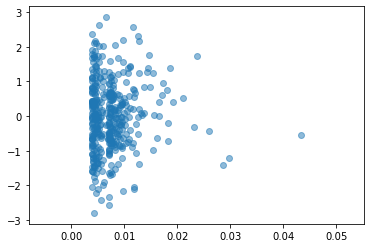

In [7]:
#h)
model_leverage = lm_fit.get_influence().hat_matrix_diag
model_norm_residuals = lm_fit.get_influence().resid_studentized_internal
plt.scatter(model_leverage, model_norm_residuals, alpha = 0.5)